<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

This notebook is modified by Neal Caren.

# Introducing the data science stack



There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

This section provides an overview of the Scikit-Learn API; a solid understanding of these API elements will form the foundation for understanding the deeper practical discussion of machine learning algorithms and approaches in the following chapters.

We will start by covering *data representation* in Scikit-Learn, followed by covering the *Estimator* API, and finally go through a more interesting example of using these tools for exploring a set of images of hand-written digits.

In [3]:
%matplotlib inline

import pandas as pd
import seaborn as sns

In [4]:
# df = pd.read_csv('https://raw.githubusercontent.com/nealcaren/CSSS-CABD/master/files/titanic_train.csv')

df = pd.read_csv('files/titanic_train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


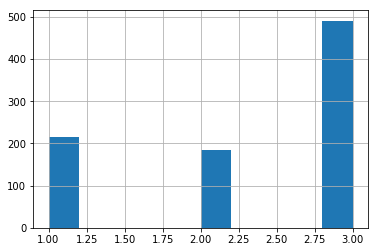

In [9]:
df['Pclass'].hist()

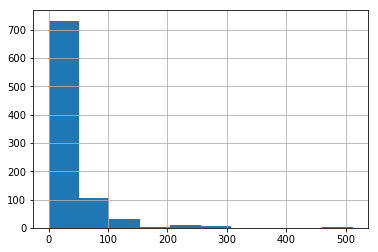

In [10]:
df['Fare'].hist()

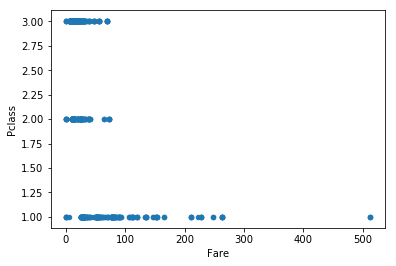

In [11]:
df.plot(kind="scatter",     
              x="Fare",          
              y="Pclass")  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119bece10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119defb10>]], dtype=object)

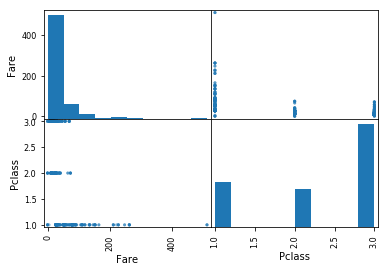

In [12]:
pd.plotting.scatter_matrix(df[['Fare','Pclass']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119ef6cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a396f90>]], dtype=object)

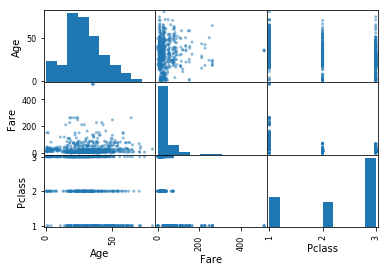

In [13]:
pd.plotting.scatter_matrix(df[['Age','Fare','Pclass']])

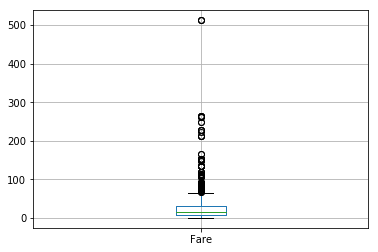

In [14]:
df.boxplot(column='Fare')

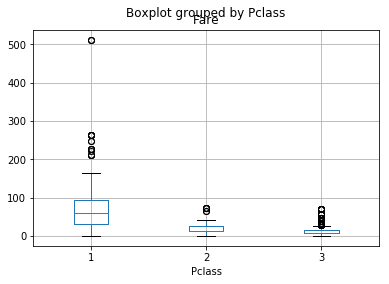

In [16]:
df.boxplot(column='Fare',
           by = 'Pclass')

For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations discussed in the [Chapter 3](03.00-Introduction-to-Pandas.ipynb):

To summarize, the expected layout of features and target values is visualized in the following diagram:

## How data science views data

![](https://github.com/nealcaren/CSSS-CABD/raw/master/images/05.02-samples-features.png)

With this data properly formatted, we can move on to consider the *estimator* API of Scikit-Learn:

## Scikit-Learn's Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas ``DataFrame``s, SciPy sparse matrices) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Supervised learning example: Simple linear regression

#### 1. Choose a class of model


Sci-kit Learn's manual is the best

http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [17]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters


An important point is that *a class of model is not the same as an instance of a model*.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.
We will explore how you can quantitatively motivate the choice of hyperparameters in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb).

For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [18]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This did nothing.

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable ``y`` is already in the correct form (a length-``n_samples`` array), but we need to massage the data ``x`` to make it a matrix of size ``[n_samples, n_features]``.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [47]:
#scikit doesn't like missing data
print(len(df))
df_nomissing = df.copy()

df_nomissing.dropna(subset=['Age','Fare'], 
                    inplace=True)

X = df_nomissing[['Age']]

# note the extra [] below
y = df_nomissing[['Fare']]

len(y)

891


714

#### 4. Fit the model to your data

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [48]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
model.coef_

array([[ 0.34996368]])

In [50]:
model.intercept_

array([ 24.30090145])

Data scientists don't care about your standard errors. 

#### 5. Predict 

In [51]:
y_hat = model.predict(X)

In [52]:
y_hat

array([[ 32.00010245],
       [ 37.59952136],
       [ 33.39995717],
       [ 36.54963031],
       [ 36.54963031],
       [ 43.19894026],
       [ 25.00082881],
       [ 33.74992086],
       [ 29.20039299],
       [ 25.70075618],
       [ 44.59879499],
       [ 31.30017508],
       [ 37.94948504],
       [ 29.20039299],
       [ 43.54890395],
       [ 25.00082881],
       [ 35.14977558],
       [ 36.54963031],
       [ 36.19966663],
       [ 29.55035668],
       [ 34.09988454],
       [ 27.1006109 ],
       [ 37.59952136],
       [ 30.9502114 ],
       [ 38.29944872],
       [ 47.39850444],
       [ 34.09988454],
       [ 38.99937608],
       [ 31.65013877],
       [ 30.60024772],
       [ 29.20039299],
       [ 38.29944872],
       [ 33.74992086],
       [ 25.35079249],
       [ 30.9502114 ],
       [ 30.60024772],
       [ 26.75064722],
       [ 31.65013877],
       [ 41.44912185],
       [ 34.44984822],
       [ 47.04854076],
       [ 31.65013877],
       [ 34.27486638],
       [ 26

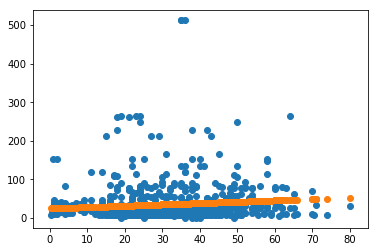

In [53]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.scatter(X, y_hat)

In [54]:
df_nomissing['Fare_predicted'] = y_hat

In [55]:
df_nomissing.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_predicted
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,5.083746
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,24.447886
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,31.343921
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,34.099885
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,37.599521
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,52.297996


#### Let's try it again with another variable

In [56]:
df_nomissing['Male'] = df_nomissing['Sex'] == 'male'

In [57]:
df_nomissing['Male'].mean()

0.63445378151260501

In [58]:
X = df_nomissing[['Age','Male']]

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

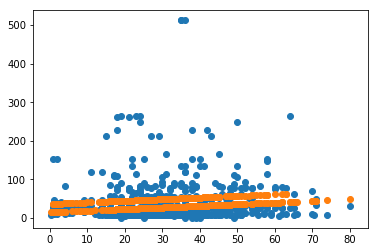

In [59]:
plt.scatter(df_nomissing['Age'], y)
plt.scatter(df_nomissing['Age'], model.predict(X))

In [61]:
df_nomissing['Fare_predicted_2'] = model.predict(X)

df_nomissing[['Fare','Fare_predicted','Fare_predicted_2']].describe()

,Fare,Fare_predicted,Fare_predicted_2
count,714.000000,714.000000,714.000000
mean,34.694514,34.694514,34.694514
std,52.918930,5.083746,11.494073
min,0.000000,24.447886,14.648225
25%,8.050000,31.343921,24.988194
50%,15.741700,34.099885,31.963405
75%,33.375000,37.599521,45.015170
max,512.329200,52.297996,62.192929


In [62]:
df_nomissing[['Fare','Fare_predicted','Fare_predicted_2']].corr()

,Fare,Fare_predicted,Fare_predicted_2
Fare,1.000000,0.096067,0.217202
Fare_predicted,0.096067,1.000000,0.442293
Fare_predicted_2,0.217202,0.442293,1.000000


<div class="alert alert-info">
Add PassengerId to the model!

Does it improve the correlation?
</div>

<div class="alert alert-info">
Load `seattle_bike.csv`. Can you estimate bike traffic on the Seattle's Freemont bridge?

Variables:    
`Mon`-`Sun`: Day's of the week    
`holiday`: Federal holiday    
`daylight_hrs`: Hours of daylight    
`PRCP`: Amount of precipitation    
`dry day`: No precipitation    
`Temp (C)`: Temperature    
`annual`: Fractional year since program started    
</div>
Data courtesy of Jake VanderPlas.

In [6]:
daily = pd.read_csv('files/seattle_bike.csv', index_col='Date')

In [7]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()

X = daily[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
y = daily['dry day']
lm.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
probabilities = lm.predict_proba(X)
probabilities[:10]

array([[ 0.41477297,  0.58522703],
       [ 0.43399355,  0.56600645],
       [ 0.45962138,  0.54037862],
       [ 0.38276405,  0.61723595],
       [ 0.39556081,  0.60443919],
       [ 0.39556081,  0.60443919],
       [ 0.42758635,  0.57241365],
       [ 0.41477297,  0.58522703],
       [ 0.43399355,  0.56600645],
       [ 0.45962138,  0.54037862]])

In [10]:
daily['dry probability'] = [pr[1] for pr in probabilities]

daily[['dry day','dry probability']].describe()

,dry day,dry probability
count,1064.000000,1064.000000
mean,0.584586,0.584306
std,0.493025,0.024802
min,0.000000,0.540379
25%,0.000000,0.566006
50%,1.000000,0.585227
75%,1.000000,0.604439
max,1.000000,0.617236


In [12]:
daily.groupby('dry day')['dry probability'].mean()

dry day
0.0    0.582786
1.0    0.585386
Name: dry probability, dtype: float64

### Supervised learning example: Iris classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function:

In [15]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [16]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [18]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

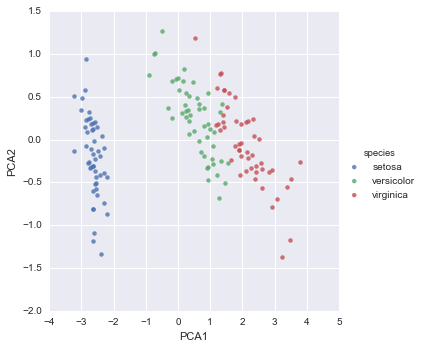

In [19]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

### Unsupervised learning: Iris clustering

Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a powerful clustering method called a Gaussian mixture model (GMM), discussed in more detail in [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb).
A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [20]:
from sklearn.mixture import GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

As before, we will add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results:

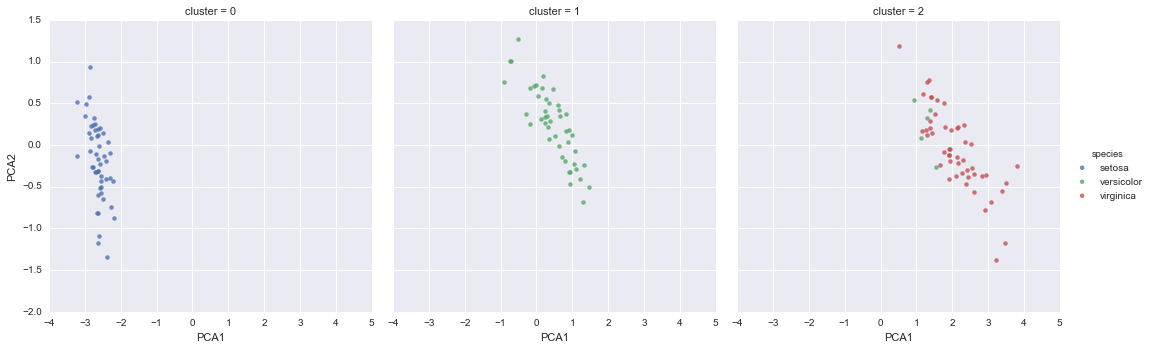

In [21]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the *setosa* species is separated perfectly within cluster 0, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

## Application: Exploring Hand-written Digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

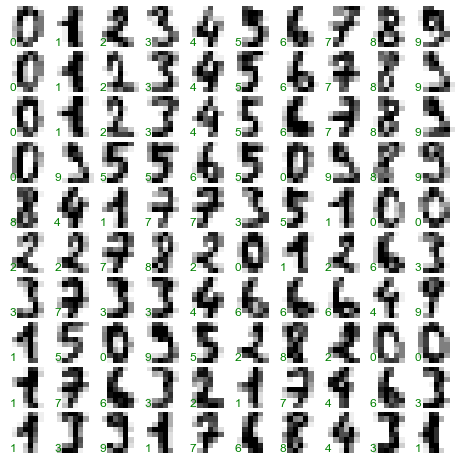

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.
We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [24]:
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called *Isomap* (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)), and transform the data to two dimensions:

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

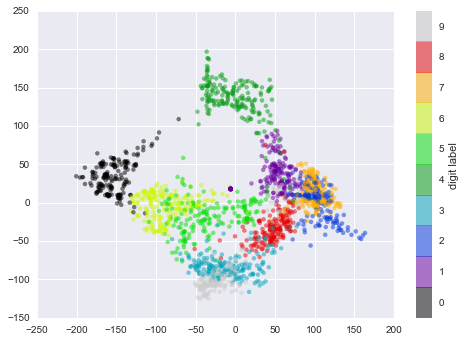

In [27]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple) have very little overlap in parameter space.
Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.

Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data.
Let's give it a try.

### Classification on digits

Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

With even this extremely simple model, we find about 80% accuracy for classification of the digits!
However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn:

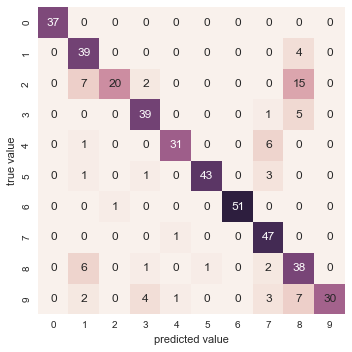

In [31]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels, and red for incorrect labels:

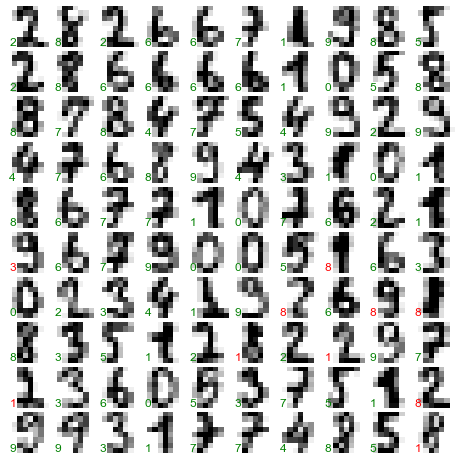

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), random forests (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)) or another classification approach.

## Summary

In this section we have covered the essential features of the Scikit-Learn data representation, and the estimator API.
Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds.
Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

In the next section, we will explore perhaps the most important topic in machine learning: how to select and validate your model.

<!--NAVIGATION-->
< [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb) | [Contents](Index.ipynb) | [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) >